# Total field anomaly - Prism

**This notebook shows the calculation of the total field magnetic anomaly due to rectangular prism with finite dimensions. This implementation is based on Nagy (2000), where we calculate the values of the anomaly given the dimensions of the prisms in the $x$, $y$ and $z$ directions.**

**Unlike the implementation proposed in Blakely (1996), it is not necessary to calculate the subtraction between the initial and final depths, $z_1$ and $z_2$.**

In [1]:
# Importing all usefull libraries
import numpy as np
import matplotlib.pyplot as plt

In [46]:
# Positions and number of points
n = 1000
x = np.linspace(-3000, 3000, n)
y = np.copy(x)
z = -100.
# Computes the mesh of all points
X, Y = np.meshgrid(x, y)

In [53]:
# Setting the parameters for prism
model = [-500., 500., -500., 500., 300., 600., 1.5] # meters + A/m2

# Writing inclination, declination, azimuth 
direc = [44., 32.] # source
field = [44., 32.] # regional field

In [54]:
# Importing main modules
from codes.prism import prism_tf
# Importing auxiliars modules
from codes.statistical import analysis
from codes.auxiliars import addnoise

In [55]:
# Calculating total field due to a solid prims
# 1 - Simple profile
tf = prism_tf(x, y, z, model, direc, field)
# Contour map
tfa = prism_tf(X, Y, z, model, direc, field)

In [56]:
# Analyzing
_ = analysis(tfa, 'nT')

Minimum:    -65.1281 nT
Maximum:    130.8100 nT
Mean value: 0.5092 nT
Variation:  195.9381 nT


In [57]:
# 2 Adding noise
tf_noise = addnoise(tf, 5., 0.01)
tfa_noise = addnoise(tfa, 5., 0.01)

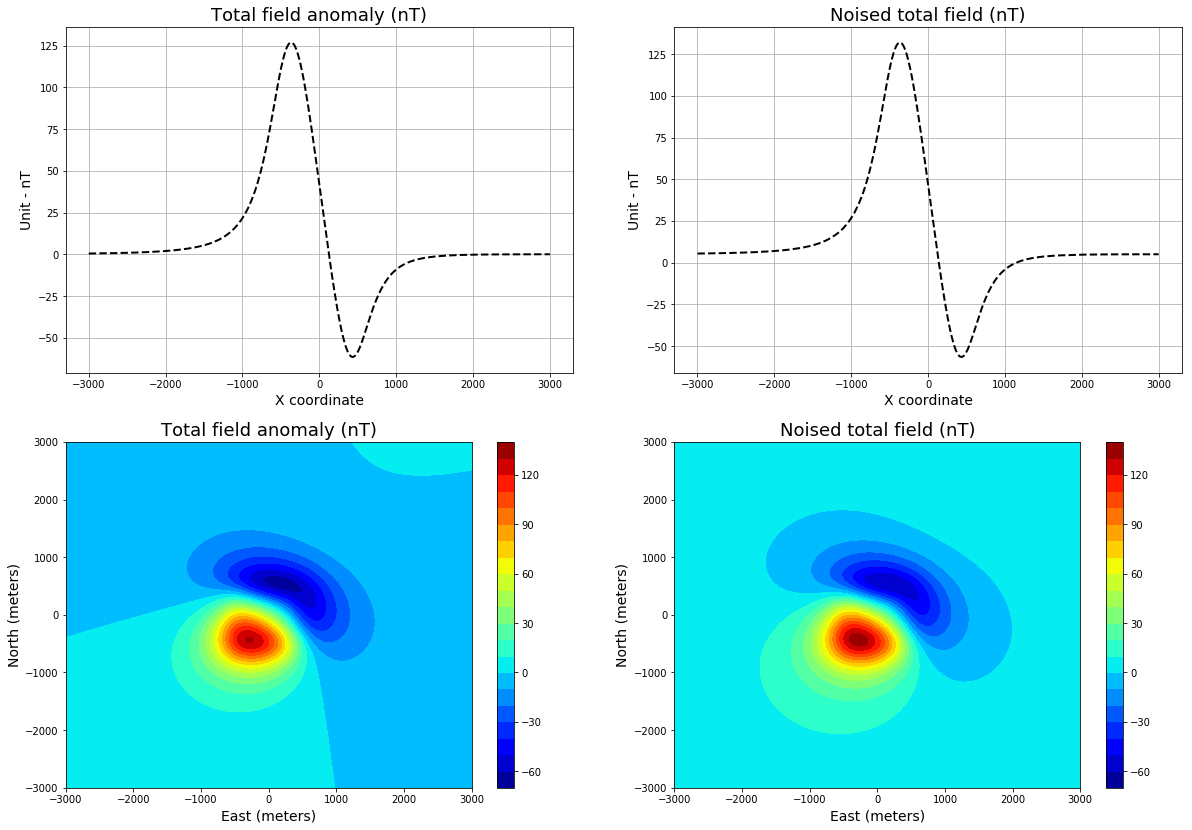

In [58]:
# Ploting all results 
plt.close('all')
plt.figure(figsize=(20,14))

plt.subplot(2, 2, 1)
plt.plot(x, tf, 'k--', linewidth = 2)
plt.title('Total field anomaly (nT)', fontsize = 18)
plt.xlabel('X coordinate', fontsize = 14)
plt.ylabel('Unit - nT', fontsize = 14)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(x, tf_noise, 'k--', linewidth = 2)
plt.title('Noised total field (nT)', fontsize = 18)
plt.xlabel('X coordinate', fontsize = 14)
plt.ylabel('Unit - nT', fontsize = 14)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid()

plt.subplot(2, 2, 3)
plt.contourf(Y, X, tfa, 20, cmap = plt.cm.jet)
plt.title('Total field anomaly (nT)', fontsize = 18)
plt.xlabel('East (meters)', fontsize = 14)
plt.ylabel('North (meters)', fontsize = 14)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.colorbar()

plt.subplot(2, 2, 4)
plt.contourf(Y, X, tfa_noise, 20, cmap = plt.cm.jet)
plt.title('Noised total field (nT)', fontsize = 18)
plt.xlabel('East (meters)', fontsize = 14)
plt.ylabel('North (meters)', fontsize = 14)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.colorbar()

plt.savefig('figures/prism-totalfield.png')
plt.show()